DEFUZZIFICATION


Lambda-Cut Threshold (λ): 0.5
----- Step-by-Step Lambda-Cut Process -----

Step 1: Original Membership Values:
For Triangle Membership Function:
x = 0.00, Membership Value = 0.00
x = 1.00, Membership Value = 0.00
x = 2.00, Membership Value = 0.00
x = 3.01, Membership Value = 0.34
x = 4.01, Membership Value = 0.67
x = 5.01, Membership Value = 1.00
x = 6.01, Membership Value = 0.66
x = 7.01, Membership Value = 0.33
x = 8.02, Membership Value = 0.00
x = 9.02, Membership Value = 0.00

For Gaussian Membership Function:
x = 0.00, Membership Value = 0.00
x = 1.00, Membership Value = 0.00
x = 2.00, Membership Value = 0.01
x = 3.01, Membership Value = 0.14
x = 4.01, Membership Value = 0.61
x = 5.01, Membership Value = 1.00
x = 6.01, Membership Value = 0.60
x = 7.01, Membership Value = 0.13
x = 8.02, Membership Value = 0.01
x = 9.02, Membership Value = 0.00

Step 2: Apply Lambda-Cut (Thresholding the Membership Function at λ = 0.5):

For Triangle Membership Function (after Lambda-Cut):
x = 0.00

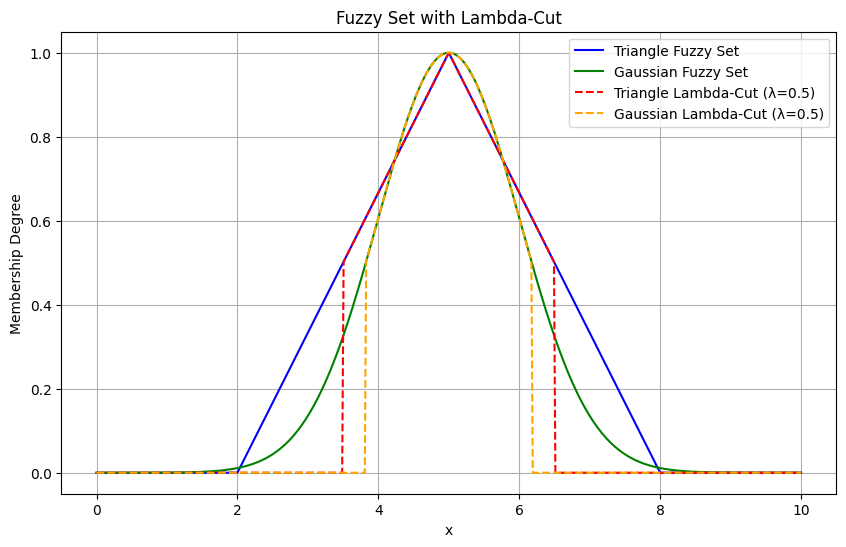


Step 4: Centroid Defuzzification Results
Centroid of the Triangle Fuzzy Set (after Lambda-Cut) is: 5.00
Centroid of the Gaussian Fuzzy Set (after Lambda-Cut) is: 5.00


In [12]:
import numpy as np
import matplotlib.pyplot as plt



def triangle_membership(x, a, b, c):
    """Triangle membership function: a <= x <= c, peak at b"""
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def gaussian_membership(x, mean, sigma):
    """Gaussian membership function"""
    return np.exp(-0.5 * ((x - mean) / sigma) ** 2)


x = np.linspace(0, 10, 500)


triangle_set = triangle_membership(x, 2, 5, 8)
gaussian_set = gaussian_membership(x, 5, 1)


lambda_value = 0.5


triangle_cut = np.where(triangle_set >= lambda_value, triangle_set, 0)
gaussian_cut = np.where(gaussian_set >= lambda_value, gaussian_set, 0)


print(f"\nLambda-Cut Threshold (λ): {lambda_value}")
print("----- Step-by-Step Lambda-Cut Process -----")


print("\nStep 1: Original Membership Values:")
print("For Triangle Membership Function:")
for i in range(0, len(x), 50):
    print(f"x = {x[i]:.2f}, Membership Value = {triangle_set[i]:.2f}")

print("\nFor Gaussian Membership Function:")
for i in range(0, len(x), 50):
    print(f"x = {x[i]:.2f}, Membership Value = {gaussian_set[i]:.2f}")


print("\nStep 2: Apply Lambda-Cut (Thresholding the Membership Function at λ = 0.5):")
print("\nFor Triangle Membership Function (after Lambda-Cut):")
for i in range(0, len(x), 50):
    print(f"x = {x[i]:.2f}, Membership Value (after Lambda-Cut) = {triangle_cut[i]:.2f}")

print("\nFor Gaussian Membership Function (after Lambda-Cut):")
for i in range(0, len(x), 50):
    print(f"x = {x[i]:.2f}, Membership Value (after Lambda-Cut) = {gaussian_cut[i]:.2f}")


plt.figure(figsize=(10, 6))


plt.plot(x, triangle_set, label='Triangle Fuzzy Set', color='blue')
plt.plot(x, gaussian_set, label='Gaussian Fuzzy Set', color='green')


plt.plot(x, triangle_cut, label=f'Triangle Lambda-Cut (λ={lambda_value})', color='red', linestyle='--')
plt.plot(x, gaussian_cut, label=f'Gaussian Lambda-Cut (λ={lambda_value})', color='orange', linestyle='--')

plt.title('Fuzzy Set with Lambda-Cut')
plt.xlabel('x')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()


def centroid_defuzzification(x, mu_cut):
    """
    Perform Centroid defuzzification: return the crisp value based on Lambda-Cut.
    """
    numerator = np.sum(x * mu_cut)
    denominator = np.sum(mu_cut)
    if denominator != 0:
        return numerator / denominator
    else:
        return None


triangle_centroid = centroid_defuzzification(x, triangle_cut)
gaussian_centroid = centroid_defuzzification(x, gaussian_cut)


print(f"\nStep 4: Centroid Defuzzification Results")
print(f"Centroid of the Triangle Fuzzy Set (after Lambda-Cut) is: {triangle_centroid:.2f}")
print(f"Centroid of the Gaussian Fuzzy Set (after Lambda-Cut) is: {gaussian_centroid:.2f}")
